In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv("data/stud.csv")

In [59]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
# df["Total"] = df["math_score"]+df["reading_score"]+df["writing_score"]
# df.drop(columns=['math_score','reading_score','writing_score'], inplace=True)
# df.head()

In [61]:
X = df.drop(columns=['math_score'],axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [62]:
y = df["math_score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [63]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


In [64]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

OHE = OneHotEncoder()
SC = StandardScaler()

preprocessor = ColumnTransformer(
    [
    ("onehotencoder" , OHE, cat_features),
    ("standardscaler" , SC, num_features)
    ]
)

In [65]:
X = preprocessor.fit_transform(X)

In [66]:
X.shape

(1000, 19)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [69]:
def evaluate_model(true, pred):
    r2 = r2_score(true,pred)
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = root_mean_squared_error(true,pred)

    return r2, mae, mse, rmse
    

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [71]:
models = {
    "linear_regression" : LinearRegression(),
    "ridge" : Ridge(),
    "lasso" : Lasso(),
    "KNN" : KNeighborsRegressor(),
    "Decision_Tree" : DecisionTreeRegressor(),
    "random_forest" : RandomForestRegressor(),
    "Adaboost" : AdaBoostRegressor(),
    "svr" : SVR(),
    "xgboost" : XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_r2, train_mae, train_mse, train_rmse =  evaluate_model(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    test_r2, test_mae, test_mse, test_rmse =  evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))
    print("- Mean score Error: {:.4f}".format(train_mse))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    print("- Mean score Error: {:.4f}".format(train_mse))
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')

    

linear_regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
- Mean score Error: 28.3349
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804
- Mean score Error: 28.3349


ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
- Mean score Error: 28.3378
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
- Mean score Error: 28.3378


lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
- Mean score Error: 43.4784
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
- Mean score Error: 43.47

In [72]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Models', 'R2_score']).sort_values(by=["R2_score"],ascending=False)

,Models,R2_score
1,ridge,0.880593
0,linear_regression,0.880433
5,random_forest,0.851328
6,Adaboost,0.845254
8,xgboost,0.827797
2,lasso,0.825320
3,KNN,0.783813
4,Decision_Tree,0.729512
7,svr,0.728600


In [73]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


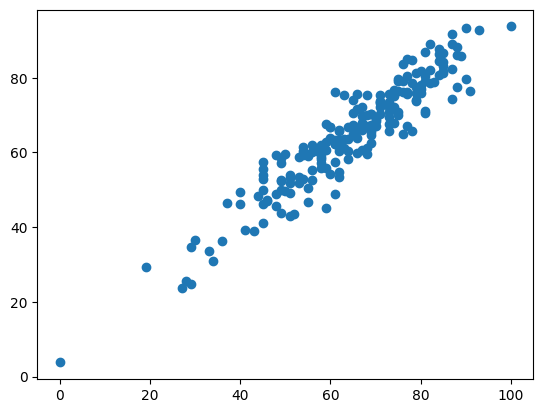

In [74]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

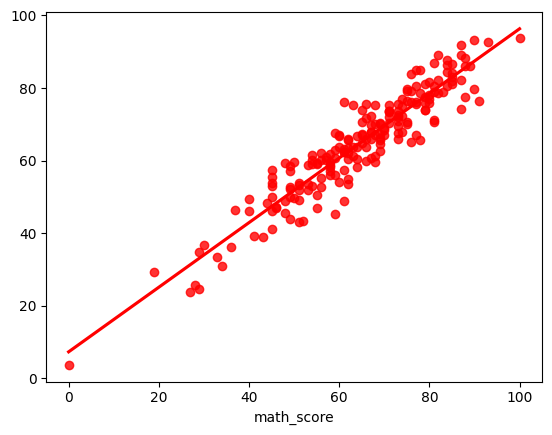

In [80]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='red')

In [82]:
pred_difference = pd.DataFrame({'actual_value':y_test, 'pred_value':y_pred, 'diff_value':y_test-y_pred})
pred_difference

,actual_value,pred_value,diff_value
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
